# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

## 0.미션

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보입니다. 우리는 평균대기시간을 예측하고자 합니다.
    * 요일, 월, 계절, 연도별 운행 정보에 어떤 주기와 변화가 있는지 탐색해 봅시다.
* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 :
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 합니다.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여할 수 있습니다.
    * 이를 위한 데이터 구조를 만들어 봅시다.
        * 분석 단위는 일별 데이터 입니다.
        * 주어진 데이터 : 장애인 콜택시 운행 정보, 서울시 날씨
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다.
            * 예를 들어,
                * 2020-12-23 의 날씨 데이터는 전 날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
        * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙여서 만듭시다.
        * 휴무일 데이터는 패키지를 통해서 다운받아 사용합니다.
    * Feature Engineering
        * 대기시간에 영향을 주는 요인을 도출하고(가설수립) 이를 feature로 생성합시다.
        * 주어진 그대로의 데이터가 아닌 새로운 feature를 생성해 봅시다.
            * 날짜와 관련된 feature : 요일, 월, 계절 ...
            * 시계열 특성이 반영된 feature : 최근 7일간의 평균 대기시간 ...




## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [2]:
# colab 그래프 한글화 코드
# jupyter 사용시 코드 주석처리 할 것.
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import warnings

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# warnings.simplefilter(action='ignore', category=UserWarning)

# plt.rc('font', family='NanumBarunGothic')
# mpl.rcParams['axes.unicode_minus'] = False

# # colab - drive 연동
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [5]:
# !pip install -r requirements.txt

In [2]:
pip install koreanize_matplotlib

     ---------------------------------------- 7.9/7.9 MB 16.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


#### 2) 라이브러리 로딩

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import joblib

### (3) 데이터 불러오기
* 주어진 데이터셋
    * 장애인 콜택시 운행 정보 : open_data.csv
    * 날씨 데이터 : weather.csv

#### 1) 데이터로딩

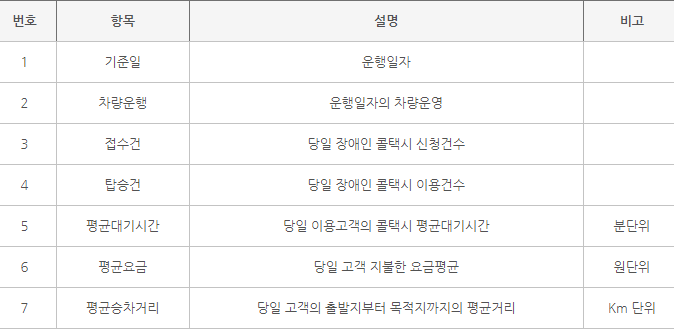

In [4]:
data = pd.read_csv('open_data.csv')
weather = pd.read_csv('weather.csv')

In [5]:
display(data.head(3))

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198


In [6]:
display(weather.head(3))

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46


#### 2) 기본 정보 조회

In [7]:
# 전체 데이터의 행,열 개수 확인
display(data.shape)
display(weather.shape)

(2922, 7)

(4018, 7)

In [8]:
# 전체 데이터의 모든 변수 확인
display(data.info())
print('=' * 50)
display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   float64
 5   humidity_min(%)  4018 non-null   float64
 6   sunshine(MJ/m2)  4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


None

#### 3) 칼럼이름을 영어로 변경
* 꼭 필요한 작업은 아니지만, 데이터를 편리하게 다루고 차트에서 불필요한 경고메시지를 띄우지 않게 하기 위해 영문으로 변경하기를 권장합니다.


In [9]:
data.rename(columns = {
    '기준일': 'Date',
    '차량운행': 'count_taxi',
    '접수건': 'receipt',
    '탑승건': 'boarding',
    '평균대기시간': 'avg_wait_time',
    '평균요금': 'avg_rate',
    '평균승차거리': 'avg_ride_distance'
}, inplace = True)

In [10]:
display(data.head(3))

,Date,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611
2,2015-01-03,209,1648,1514,26.2,2377,10198


## 2.데이터 기본 탐색

* **세부요구사항**
    * 날짜 요소에 따라 각 정보의 패턴을 조회 합니다.
        * 일별, 요일별, 주차별, 월별, 연도별
        * 접수건, 탑승건, 거리, 요금, 대기시간 등
    * 제시된 범위 외에 가능하다면 추가 탐색을 시도합니다.

### (1) 주기별 분석을 위해서 날짜 변수 추가하기
* data를 복사합니다.
* 복사한 df에 요일, 주차, 월, 연도 등을 추가합니다.

In [11]:
data['Date'] = pd.to_datetime(data['Date'])
weather['Date'] = pd.to_datetime(weather['Date'])

In [12]:
copy_df = data.copy()

copy_df['day'] = copy_df['Date'].dt.day
copy_df['weekday'] = copy_df['Date'].dt.weekday
copy_df['month'] = copy_df['Date'].dt.month
copy_df['year'] = copy_df['Date'].dt.year

In [13]:
display(copy_df.head(2))

,Date,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance,day,weekday,month,year
0,2015-01-01,213,1023,924,23.2,2427,10764,1,3,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,2,4,1,2015


### (2) 일별

* 차량 운행수

In [14]:
group_day = copy_df.groupby('day', as_index=False).mean()
display(group_day.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_21312\3457611037.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_day = copy_df.groupby('day', as_index=False).mean()


,day,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance,weekday,month,year
0,1,388.375000,3462.656250,2875.177083,37.095833,2325.781250,9481.916667,3.000000,6.5,2018.5
1,2,419.520833,3925.177083,3277.520833,37.564583,2290.927083,9128.427083,2.979167,6.5,2018.5


In [15]:
group_day[['day', 'count_taxi']]

,day,count_taxi
0,1,388.375000
1,2,419.520833
2,3,408.614583
3,4,418.666667
4,5,408.968750
5,6,409.031250
6,7,427.583333
7,8,428.739583
8,9,409.052083
9,10,416.083333


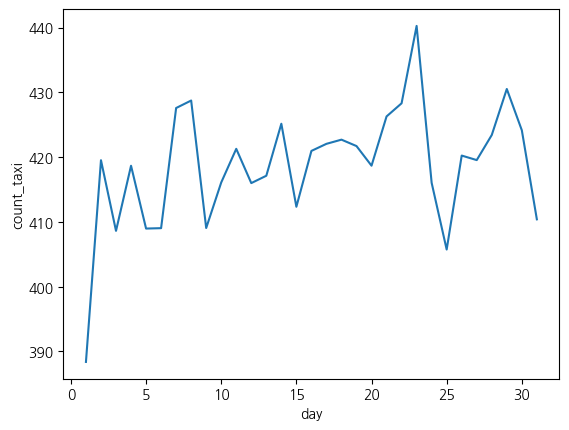

In [16]:
sns.lineplot(data=group_day, x='day', y='count_taxi')
plt.show()

* 접수건, 탑승건

In [17]:
group_day[['day', 'receipt', 'boarding']]

,day,receipt,boarding
0,1,3462.656250,2875.177083
1,2,3925.177083,3277.520833
2,3,3725.281250,3129.187500
3,4,3886.364583,3269.989583
4,5,3755.000000,3153.093750
5,6,3740.760417,3148.364583
6,7,4030.062500,3377.666667
7,8,4058.052083,3399.833333
8,9,3770.041667,3180.666667
9,10,3910.520833,3277.781250


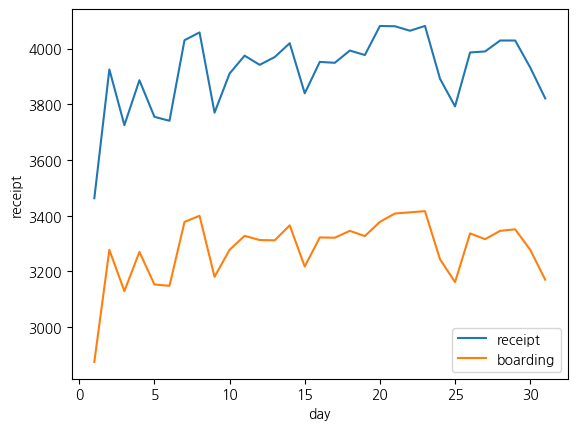

In [18]:
sns.lineplot(data=group_day, x='day', y='receipt', label='receipt')
sns.lineplot(data=group_day, x='day', y='boarding', label='boarding')
plt.legend()
plt.show()

* 대기시간

In [19]:
group_day[['day', 'avg_wait_time']]

,day,avg_wait_time
0,1,37.095833
1,2,37.564583
2,3,36.615625
3,4,38.382292
4,5,38.445833
5,6,36.551042
6,7,40.040625
7,8,41.313542
8,9,38.325000
9,10,40.586458


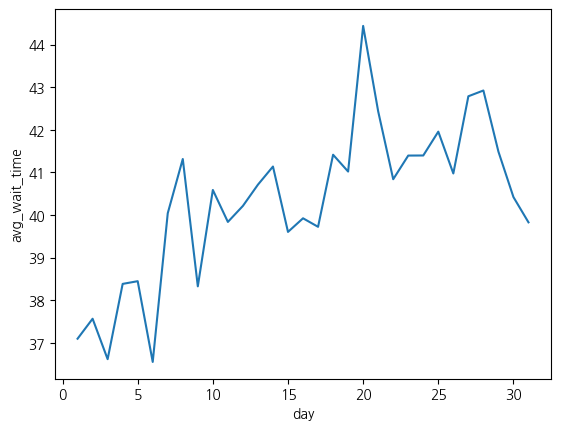

In [20]:
sns.lineplot(data=group_day, x='day', y='avg_wait_time')
plt.show()

* 운임

In [21]:
group_day[['day', 'avg_rate']]

,day,avg_rate
0,1,2325.781250
1,2,2290.927083
2,3,2312.458333
3,4,2302.812500
4,5,2309.729167
5,6,2307.687500
6,7,2294.854167
7,8,2299.104167
8,9,2306.854167
9,10,2304.322917


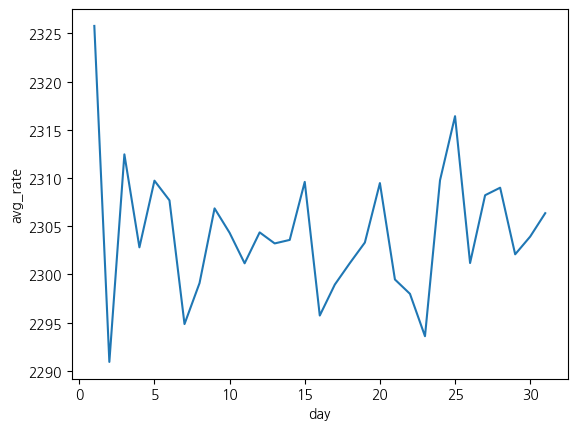

In [22]:
sns.lineplot(data=group_day, x='day', y='avg_rate')
plt.show()

* 이동거리

In [23]:
group_day[['day', 'avg_ride_distance']]

,day,avg_ride_distance
0,1,9481.916667
1,2,9128.427083
2,3,9331.250000
3,4,9242.875000
4,5,9310.510417
5,6,9294.281250
6,7,9169.781250
7,8,9199.520833
8,9,9295.677083
9,10,9253.125000


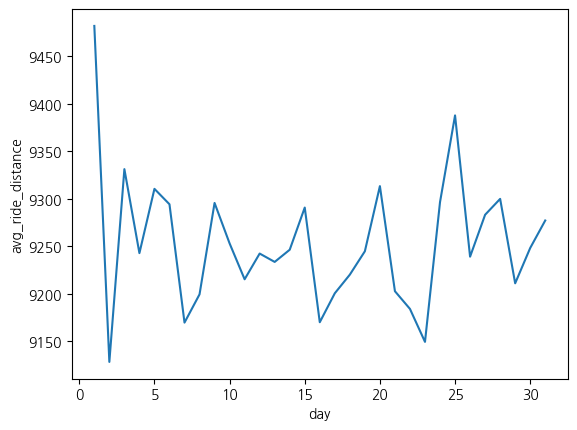

In [24]:
sns.lineplot(data=group_day, x='day', y='avg_ride_distance')
plt.show()

### (3) 요일별

* 차량 운행수

In [25]:
group_weekday = copy_df.groupby('weekday', as_index=False).mean()
display(group_weekday.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_21312\3071565478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_weekday = copy_df.groupby('weekday', as_index=False).mean()


,weekday,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance,day,month,year
0,0,485.014388,4715.040767,3961.242206,39.243165,2240.059952,8656.577938,15.764988,6.515588,2018.498801
1,1,495.076739,4800.884892,4026.791367,40.826139,2242.805755,8672.112710,15.745803,6.520384,2018.501199


In [26]:
group_weekday[['weekday', 'count_taxi']]

,weekday,count_taxi
0,0,485.014388
1,1,495.076739
2,2,484.726619
3,3,494.078947
4,4,485.107656
5,5,262.177033
6,6,224.767386


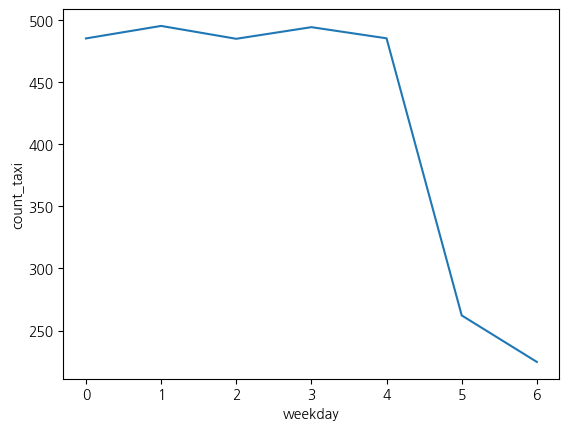

In [27]:
sns.lineplot(data=group_weekday, x='weekday', y='count_taxi')
plt.show()

* 접수건, 탑승건

In [28]:
group_weekday[['weekday', 'receipt', 'boarding']]

,weekday,receipt,boarding
0,0,4715.040767,3961.242206
1,1,4800.884892,4026.791367
2,2,4739.333333,3956.976019
3,3,4760.677033,3978.200957
4,4,4692.066986,3877.385167
5,5,2069.081340,1693.839713
6,6,1702.781775,1493.556355


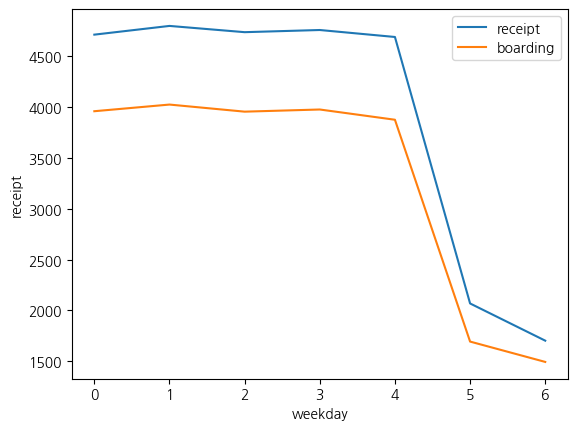

In [29]:
sns.lineplot(data=group_weekday, x='weekday', y='receipt', label='receipt')
sns.lineplot(data=group_weekday, x='weekday', y='boarding', label='boarding')
plt.legend()
plt.show()

* 대기시간

In [30]:
group_weekday[['weekday', 'avg_wait_time']]

,weekday,avg_wait_time
0,0,39.243165
1,1,40.826139
2,2,41.676259
3,3,41.043780
4,4,40.956459
5,5,43.480144
6,6,34.902878


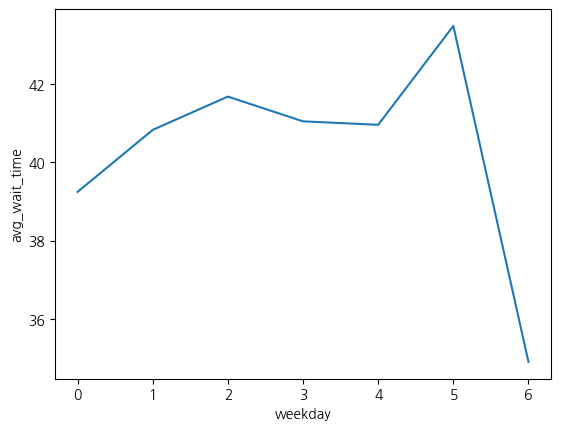

In [31]:
sns.lineplot(data=group_weekday, x='weekday', y='avg_wait_time')
plt.show()

* 운임

In [32]:
group_weekday[['weekday', 'avg_rate']]

,weekday,avg_rate
0,0,2240.059952
1,1,2242.805755
2,2,2250.422062
3,3,2256.366029
4,4,2246.023923
5,5,2429.641148
6,6,2464.541966


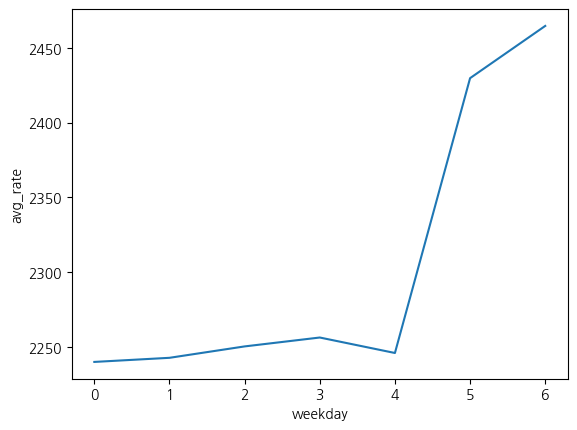

In [33]:
sns.lineplot(data=group_weekday, x='weekday', y='avg_rate')
plt.show()

* 이동거리

In [34]:
group_weekday[['weekday', 'avg_ride_distance']]

,weekday,avg_ride_distance
0,0,8656.577938
1,1,8672.112710
2,2,8752.038369
3,3,8786.901914
4,4,8733.665072
5,5,10431.468900
6,6,10741.275779


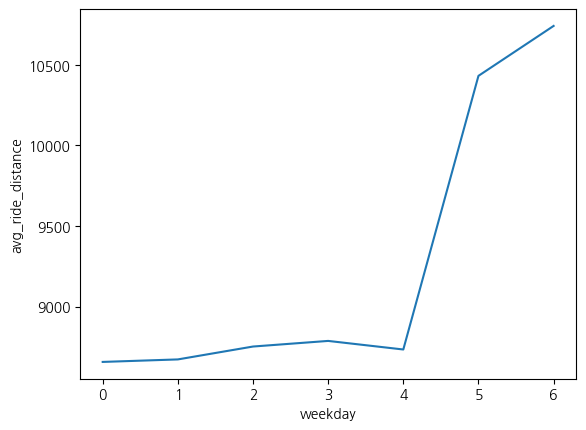

In [35]:
sns.lineplot(data=group_weekday, x='weekday', y='avg_ride_distance')
plt.show()

### (4) 월별

* 차량 운행수

In [36]:
group_month = copy_df.groupby('month', as_index=False).mean()
display(group_month.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_21312\2097735887.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_month = copy_df.groupby('month', as_index=False).mean()


,month,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance,day,weekday,year
0,1,379.286290,3681.826613,3092.262097,33.393952,2279.616935,9048.161290,16.000000,3.024194,2018.500000
1,2,373.486726,3582.097345,3032.075221,34.419469,2296.623894,9221.039823,14.628319,2.995575,2018.495575


In [37]:
group_month[['month', 'count_taxi']]

,month,count_taxi
0,1,379.286290
1,2,373.486726
2,3,398.758065
3,4,416.187500
4,5,413.556452
5,6,430.925000
6,7,436.935484
7,8,434.500000
8,9,446.412500
9,10,432.939516


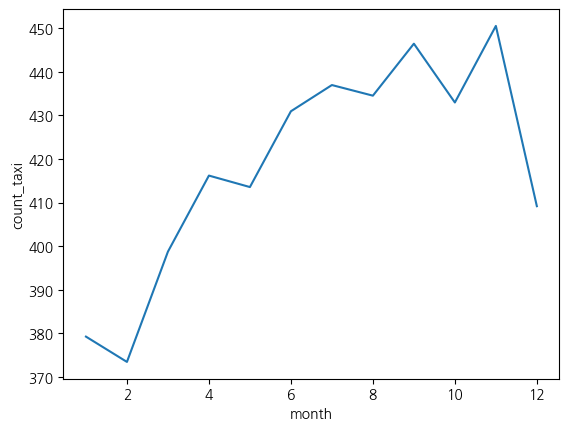

In [38]:
sns.lineplot(data=group_month, x='month', y='count_taxi')
plt.show()

* 접수건, 탑승건

In [39]:
group_month[['month', 'receipt', 'boarding']]

,month,receipt,boarding
0,1,3681.826613,3092.262097
1,2,3582.097345,3032.075221
2,3,3691.330645,3168.822581
3,4,3964.479167,3358.558333
4,5,3910.572581,3278.435484
5,6,4001.304167,3372.837500
6,7,4099.637097,3437.862903
7,8,4014.963710,3350.512097
8,9,3962.508333,3287.950000
9,10,4007.709677,3316.850806


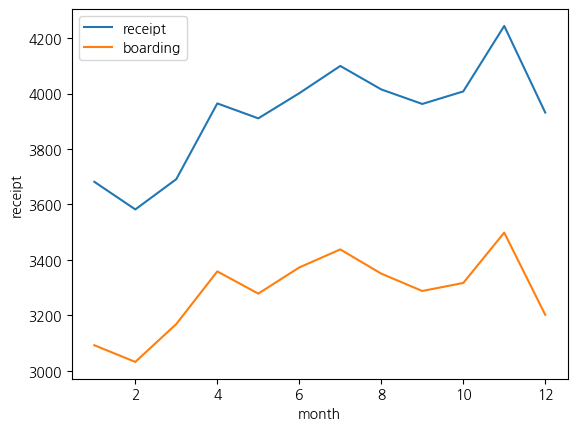

In [40]:
sns.lineplot(data=group_month, x='month', y='receipt', label='receipt')
sns.lineplot(data=group_month, x='month', y='boarding', label='boarding')
plt.legend()
plt.show()

* 대기시간

In [41]:
group_month[['month', 'avg_wait_time']]

,month,avg_wait_time
0,1,33.393952
1,2,34.419469
2,3,35.182258
3,4,39.628750
4,5,41.181452
5,6,40.381667
6,7,40.033468
7,8,38.568952
8,9,42.364167
9,10,44.480242


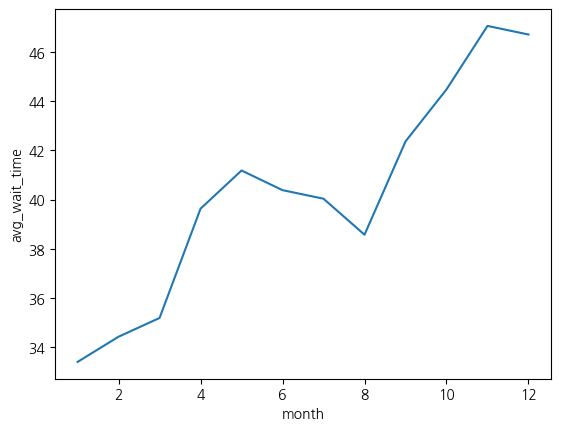

In [42]:
sns.lineplot(data=group_month, x='month', y='avg_wait_time')
plt.show()

* 운임

In [43]:
group_month[['month', 'avg_rate']]

,month,avg_rate
0,1,2279.616935
1,2,2296.623894
2,3,2291.600806
3,4,2310.712500
4,5,2326.209677
5,6,2308.991667
6,7,2290.407258
7,8,2286.189516
8,9,2331.583333
9,10,2334.774194


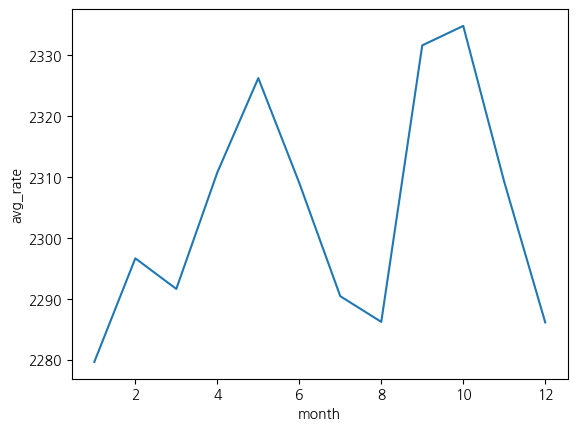

In [44]:
sns.lineplot(data=group_month, x='month', y='avg_rate')
plt.show()

* 이동거리

In [45]:
group_month[['month', 'avg_ride_distance']]

,month,avg_ride_distance
0,1,9048.161290
1,2,9221.039823
2,3,9129.588710
3,4,9313.458333
4,5,9462.447581
5,6,9292.650000
6,7,9151.556452
7,8,9127.072581
8,9,9493.016667
9,10,9485.576613


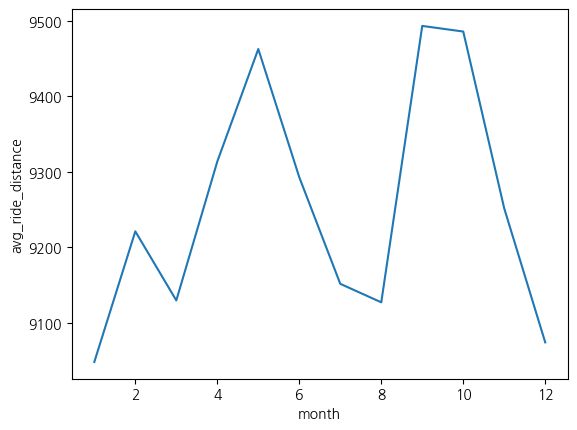

In [46]:
sns.lineplot(data=group_month, x='month', y='avg_ride_distance')
plt.show()

### (5) 연도별

* 차량 운행수

In [47]:
group_year = copy_df.groupby('year', as_index = False).mean()
display(group_year.head(2))

C:\Users\User\AppData\Local\Temp\ipykernel_21312\2472721902.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_year = copy_df.groupby('year', as_index = False).mean()


,year,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance,day,weekday,month
0,2015,381.468493,3750.531507,3268.673973,34.059452,2301.523288,9558.975342,15.720548,3.000000,6.526027
1,2016,390.314208,4005.087432,3418.183060,38.272404,2316.404372,9581.713115,15.756831,3.008197,6.513661


In [48]:
group_year[['year', 'count_taxi']]

,year,count_taxi
0,2015,381.468493
1,2016,390.314208
2,2017,405.397260
3,2018,397.758904
4,2019,399.068493
5,2020,416.521858
6,2021,468.271233
7,2022,490.898630


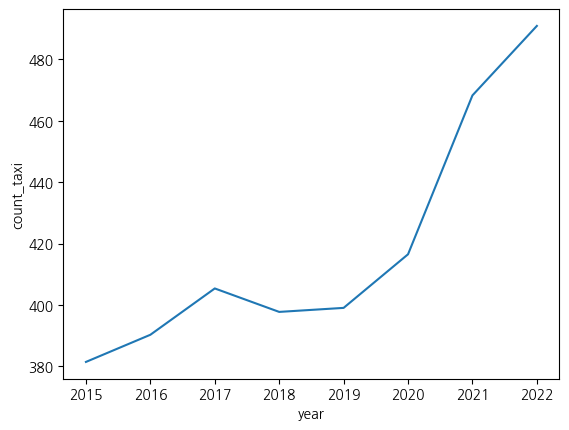

In [49]:
sns.lineplot(data=group_year, x='year', y='count_taxi')
plt.show()

* 접수건, 탑승건

In [50]:
group_year[['year', 'receipt', 'boarding']]

,year,receipt,boarding
0,2015,3750.531507,3268.673973
1,2016,4005.087432,3418.183060
2,2017,4184.745205,3471.709589
3,2018,4077.473973,3209.380822
4,2019,4104.358904,3230.279452
5,2020,3137.480874,2656.314208
6,2021,3796.821918,3344.109589
7,2022,4350.304110,3673.863014


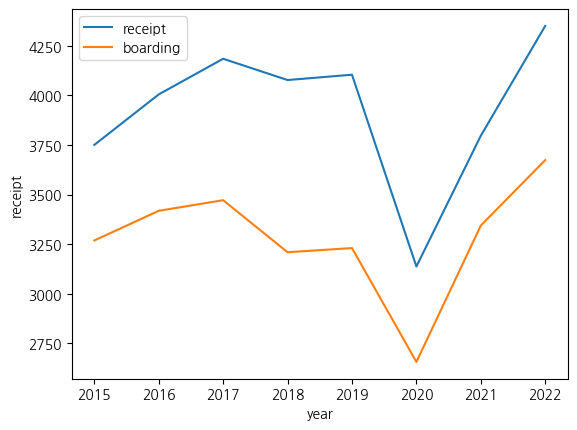

In [51]:
sns.lineplot(data=group_year, x='year', y='receipt', label='receipt')
sns.lineplot(data=group_year, x='year', y='boarding', label='boarding')
plt.legend()
plt.show()

* 대기시간

In [52]:
group_year[['year', 'avg_wait_time']]

,year,avg_wait_time
0,2015,34.059452
1,2016,38.272404
2,2017,44.143014
3,2018,56.322192
4,2019,53.455616
5,2020,28.045082
6,2021,30.720822
7,2022,37.466027


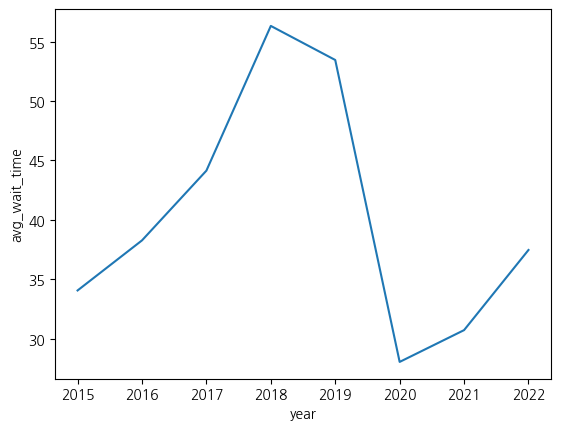

In [53]:
sns.lineplot(data=group_year, x='year', y='avg_wait_time')
plt.show()

* 운임

In [54]:
group_year[['year', 'avg_rate']]

,year,avg_rate
0,2015,2301.523288
1,2016,2316.404372
2,2017,2321.558904
3,2018,2319.293151
4,2019,2316.846575
5,2020,2308.505464
6,2021,2270.000000
7,2022,2280.002740


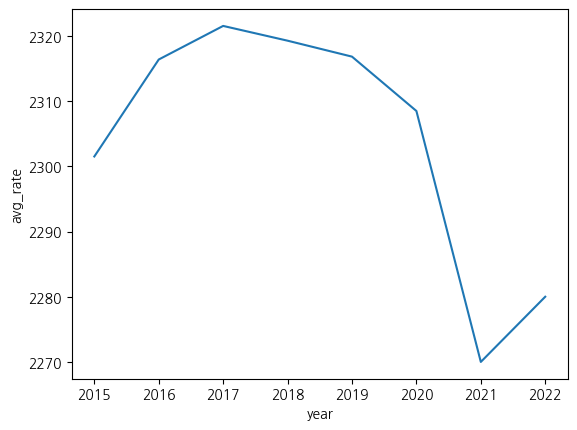

In [55]:
sns.lineplot(data=group_year, x='year', y='avg_rate')
plt.show()

* 이동거리

In [56]:
group_year[['year', 'avg_ride_distance']]

,year,avg_ride_distance
0,2015,9558.975342
1,2016,9581.713115
2,2017,9311.230137
3,2018,9296.868493
4,2019,9258.534247
5,2020,9181.213115
6,2021,8864.536986
7,2022,8974.227397


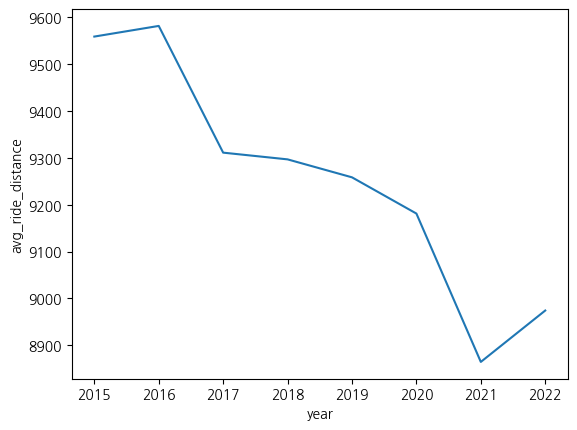

In [57]:
sns.lineplot(data=group_year, x='year', y='avg_ride_distance')
plt.show()

## 3.데이터 구조 만들기

* **세부요구사항**
    * 조건 :
        * 목표 : 전날 저녁, 다음날 평균 대기시간을 예측하고자 합니다.
        * 날씨 데이터는 실제 측정값이지만, 다음 날에 대한 예보 데이터로 간주합니다.
            * 예를 들어,
                * 2020-12-23 의 날씨 데이터는 전날(12월22일) 날씨예보 데이터로 간주하여 분석을 수행합니다.
                * 2020-12-22일의 장애인 이동 데이터로 23일의 대기시간을 예측해야 하며, 이때 고려할 날씨데이터는 23일 데이터 입니다.
    * 장애인 이동 데이터를 기준으로 날씨 데이터를 붙입니다.

### (1) target 만들기
* 예측하는 날짜, 대기시간(target)으로 기준을 잡습니다.

In [58]:
display(data.tail(3))

,Date,count_taxi,receipt,boarding,avg_wait_time,avg_rate,avg_ride_distance
2919,2022-12-29,581,5250,4247,52.5,2229,8433
2920,2022-12-30,600,5293,4200,38.3,2183,8155
2921,2022-12-31,263,2167,1806,33.7,2318,9435


In [59]:
display(weather.tail(3))

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
4015,2022-12-29,1.7,-7.8,0.0,71.0,34.0,10.88
4016,2022-12-30,2.1,-4.0,0.0,87.0,38.0,10.84
4017,2022-12-31,-4.4,-4.4,0.0,66.0,66.0,0.00


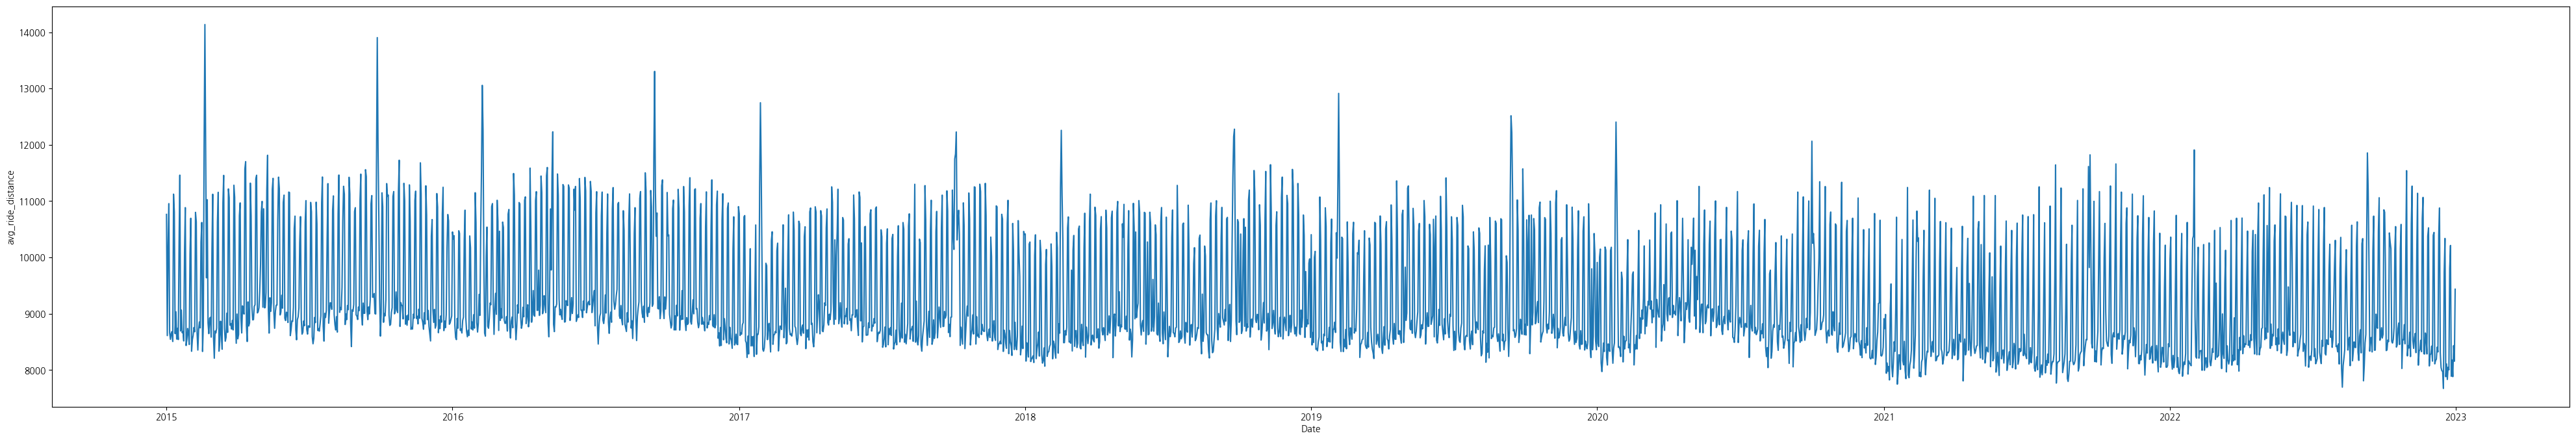

In [60]:
plt.figure(figsize=(50, 8))
sns.lineplot(data=data, x='Date', y='avg_ride_distance')
plt.show()

In [61]:
# 익일의 대기시간(waiting time)을 오늘의 데이터를 활용하여 예측 해야하는 대상(target)으로 설정
data['target'] = data['avg_wait_time'].shift(-1)
data.pop('avg_wait_time')
data['target'] = data['target'].fillna(np.round(data['target'].interpolate(method='linear')))

In [62]:
display(data.head(5))

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target
0,2015-01-01,213,1023,924,2427,10764,17.2
1,2015-01-02,420,3158,2839,2216,8611,26.2
2,2015-01-03,209,1648,1514,2377,10198,24.5
3,2015-01-04,196,1646,1526,2431,10955,26.2
4,2015-01-05,421,4250,3730,2214,8663,23.6


In [63]:
display(data.tail(5))

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target
2917,2022-12-27,669,5635,4654,2198,8178,44.8
2918,2022-12-28,607,5654,4648,2161,7882,52.5
2919,2022-12-29,581,5250,4247,2229,8433,38.3
2920,2022-12-30,600,5293,4200,2183,8155,33.7
2921,2022-12-31,263,2167,1806,2318,9435,34.0


### (2) 날씨 데이터 붙이기
* merge를 활용합니다. 기준은 운행정보 입니다.

In [64]:
# 익일의 실제 날씨 데이터를 전일에 발표된 예보데이터로 판단
weather['Date'] = weather['Date'] - pd.DateOffset(days=1)
display(weather.head(3))
display(weather.tail(3))

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2011-12-31,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-01,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-02,-0.4,-6.6,0.4,86.0,45.0,4.46


,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
4015,2022-12-28,1.7,-7.8,0.0,71.0,34.0,10.88
4016,2022-12-29,2.1,-4.0,0.0,87.0,38.0,10.84
4017,2022-12-30,-4.4,-4.4,0.0,66.0,66.0,0.00


In [65]:
df = pd.merge(data, weather, on='Date')
display(df.head(5))

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,73.0,37.0,8.66
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,89.0,58.0,5.32
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,95.0,52.0,6.48
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,98.0,29.0,10.47


### (3) 새로운 feature를 생성해 봅시다.
* 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 그외 새로운 feature 도출 : 최소 2개 이상
    * 예 : 공휴일, 최근 7주일간의 평균 대기시간, 탑승률 등

#### 1) 날짜와 관련된 변수 추가하기 : 요일, 월, 계절, 연도
* 요일 이름, 계절이름, 월 이름으로 만드는 경우에는, 변수를 pd.Categorical로 범주형을 만들면서 순서를 지정하는 것이 이후 그래프를 그릴 때 순서대로 표현할 수 있습니다.


In [66]:
df['weekday'] = df['Date'].dt.day_name()
df['weekday'] = pd.Categorical(df['weekday'],
                                  categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df['month'] = df['Date'].dt.month

df['season'] = np.where(df['month'].isin([3,4,5]), 'Spring',
                           np.where(df['month'].isin([6,7,8]), 'Summer',
                                    np.where(df['month'].isin([9,10,11]), 'Fall', 'Winter')))
df['season'] = pd.Categorical(df['season'], categories=['Spring','Summer','Fall','Winter'])

df['year'] = df['Date'].dt.year

# 요일 변수 추가
df['weekend'] = df['weekday'].map(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

#### 코로나 기간 생각해보며 시각화 진행

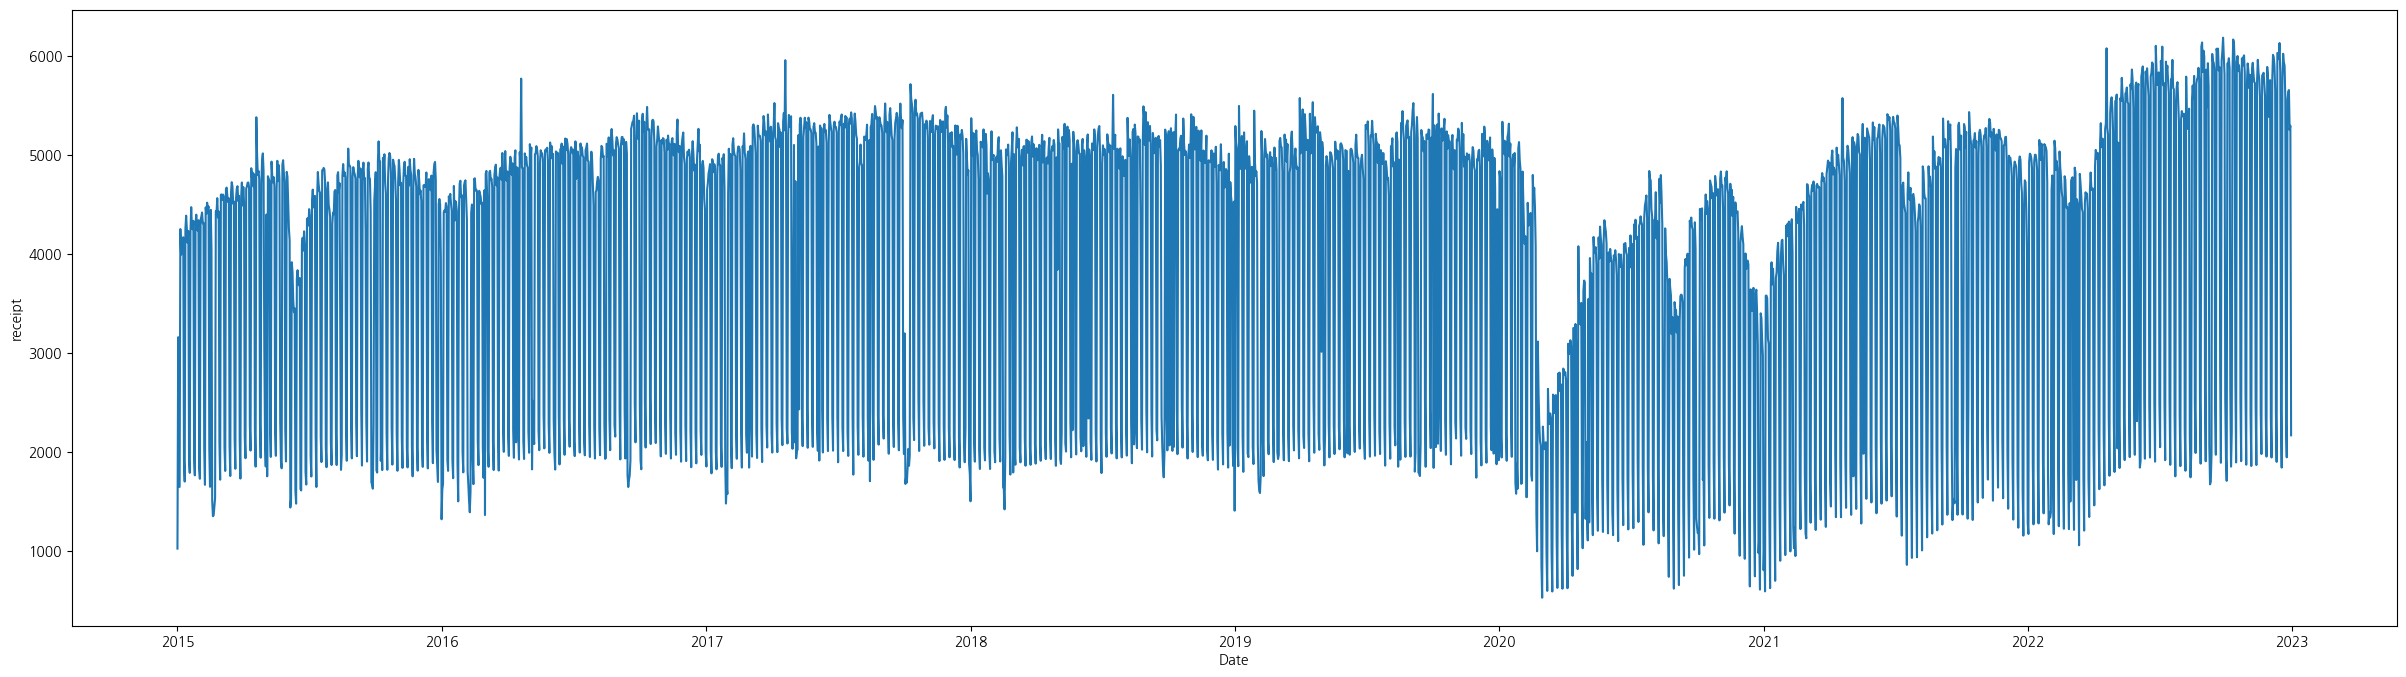

In [67]:
plt.figure(figsize=(30, 8))
sns.lineplot(data=data, x='Date', y='receipt')
plt.show()

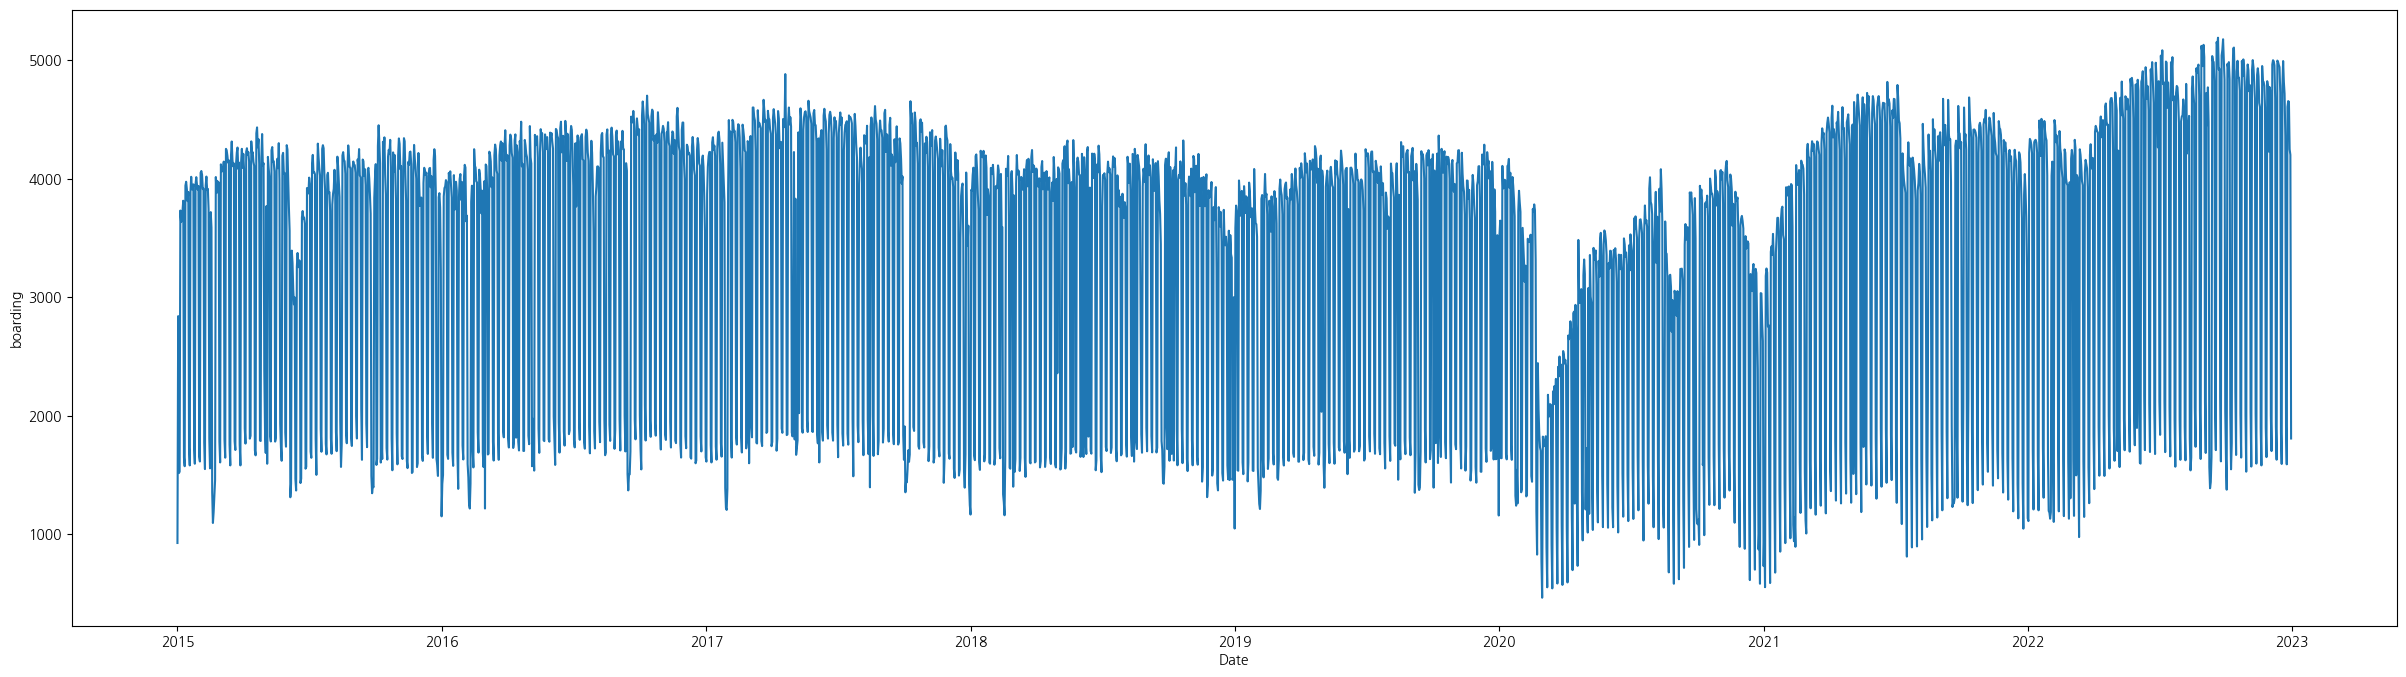

In [68]:
plt.figure(figsize=(30, 8))
sns.lineplot(data=data, x='Date', y='boarding')
plt.show()

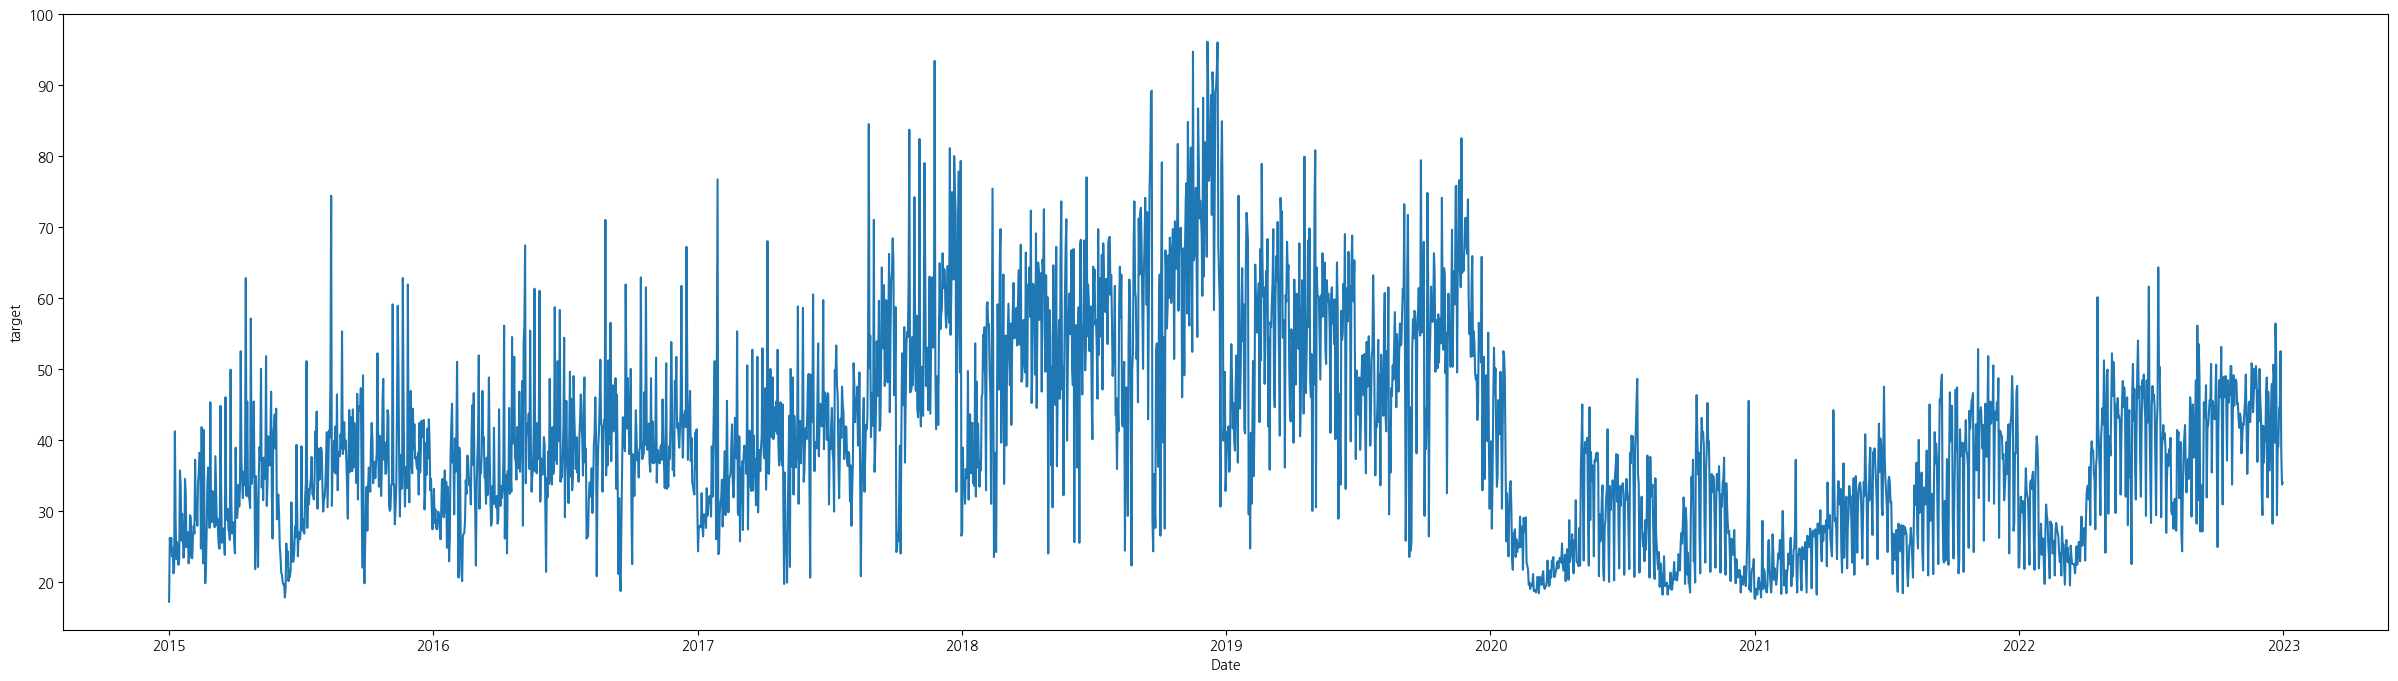

In [69]:
plt.figure(figsize=(30, 8))
sns.lineplot(data=data, x='Date', y='target')
plt.show()

In [70]:
# 코로나 컬럼 추가
"""
https://www.phwr.org/journal/view.html?uid=75&vmd=Full
https://terms.naver.com/entry.naver?docId=5928090&cid=42107&categoryId=42107
"""
corona_start_date = pd.to_datetime('2020-01-20')
corona_end_date = pd.to_datetime('2022-04-18')  # 사회적 거리두기 해제

df['covid_19'] = df['Date'].apply(lambda x: 1 if corona_start_date <= x <= corona_end_date else 0)

#### 2) 공휴일 정보
* workalendar 패키지를 설치하고, 대한민국 공휴일 정보를 끌어와 봅시다.

* 휴무일 데이터 패키지 설치

In [77]:
!pip install workalendar

  Using cached workalendar-17.0.0-py3-none-any.whl (210 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Using cached pyluach-2.2.0-py3-none-any.whl (25 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached lunardate-0.2.2-py3-none-any.whl (18 kB)
  Using cached PyMeeus-0.5.12.tar.gz (5.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=c6ce112a5735b328c81b51e504c350d33abbdb93444f6eb705ec574509094c5c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus


* 간단 사용법

In [78]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023))

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day
5,2023-05-05,Children's Day
6,2023-05-26,Buddha's Birthday
7,2023-06-06,Memorial Day
8,2023-08-15,Liberation Day
9,2023-09-28,Midautumn Festival


* 휴무일 데이터셋 만들기 2015 ~ 2022
* 실제로 휴무일에 해당하지만 workalendar 라이브러리에 없는 날짜는 직접 추가해봅시다.
    * 휴무일 장애인 콜택시의 접수건 변화에 대한 특징을 찾아 이를 바탕으로 데이터를 조회하여 찾아볼 수 있음

In [79]:
from workalendar.asia import SouthKorea

cal = SouthKorea()
holiday = pd.DataFrame()
for y in range(2015, 2023) :
    holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(y))], axis = 0)

holiday.columns = ['Date', 'holiday']
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday['holiday'] = 1
display(holiday)

,Date,holiday
0,2015-01-01,1
1,2015-02-18,1
2,2015-02-19,1
3,2015-02-20,1
4,2015-03-01,1
...,...,...
10,2022-09-10,1
11,2022-09-11,1
12,2022-10-03,1
13,2022-10-09,1


* 기존 데이터에 휴무일 정보 결합하기.
* 휴무일이 아닌 날짜는 0으로 저장하시오.

In [80]:
df = pd.merge(df, holiday, how='left')
df = df.fillna({'holiday': 0})

In [81]:
display(df.head(5))

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,weekend,covid_19,holiday
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,63.0,28.0,9.07,Thursday,1,Winter,2015,0,0,1.0
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,73.0,37.0,8.66,Friday,1,Winter,2015,0,0,0.0
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,89.0,58.0,5.32,Saturday,1,Winter,2015,1,0,0.0
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,95.0,52.0,6.48,Sunday,1,Winter,2015,1,0,0.0
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,98.0,29.0,10.47,Monday,1,Winter,2015,0,0,0.0


#### 3) 7일 이동평균 대기시간
* rolling().mean() 사용

In [82]:
# 결측치 처리를 위해 min_periods = 1 의 값으로, 최소 1개의 값이 있을때에도, 이동평균 계산
df['day7_avg_wait_time'] = df['target'].rolling(window=7, min_periods=1).mean()

#### 4) 탑승률

In [83]:
# 탑승률 = 탑승건 / 접수건
df['ride_ratio'] = np.round((df['boarding'] / df['receipt']), 2)

In [84]:
display(df.head(5))

,Date,count_taxi,receipt,boarding,avg_rate,avg_ride_distance,target,temp_max,temp_min,rain(mm),...,sunshine(MJ/m2),weekday,month,season,year,weekend,covid_19,holiday,day7_avg_wait_time,ride_ratio
0,2015-01-01,213,1023,924,2427,10764,17.2,-2.0,-8.9,0.0,...,9.07,Thursday,1,Winter,2015,0,0,1.0,17.200000,0.90
1,2015-01-02,420,3158,2839,2216,8611,26.2,2.4,-9.2,0.0,...,8.66,Friday,1,Winter,2015,0,0,0.0,21.700000,0.90
2,2015-01-03,209,1648,1514,2377,10198,24.5,8.2,0.2,0.0,...,5.32,Saturday,1,Winter,2015,1,0,0.0,22.633333,0.92
3,2015-01-04,196,1646,1526,2431,10955,26.2,7.9,-0.9,0.0,...,6.48,Sunday,1,Winter,2015,1,0,0.0,23.525000,0.93
4,2015-01-05,421,4250,3730,2214,8663,23.6,4.1,-7.4,3.4,...,10.47,Monday,1,Winter,2015,0,0,0.0,23.540000,0.88


#### 5) 평균 온도 & 평균 습도

In [85]:
df['temp_avg'] = np.round((df['temp_max'] + df['temp_min']) / 2, 1)
df['humidity_avg'] = np.round((df['humidity_max(%)'] + df['humidity_min(%)']) / 2, 1)

display(df.head().T)

,0,1,2,3,4
Date,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00
count_taxi,213,420,209,196,421
receipt,1023,3158,1648,1646,4250
boarding,924,2839,1514,1526,3730
avg_rate,2427,2216,2377,2431,2214
avg_ride_distance,10764,8611,10198,10955,8663
target,17.2,26.2,24.5,26.2,23.6
temp_max,-2.0,2.4,8.2,7.9,4.1
temp_min,-8.9,-9.2,0.2,-0.9,-7.4
rain(mm),0.0,0.0,0.0,0.0,3.4


#### holiday, weekend 관계

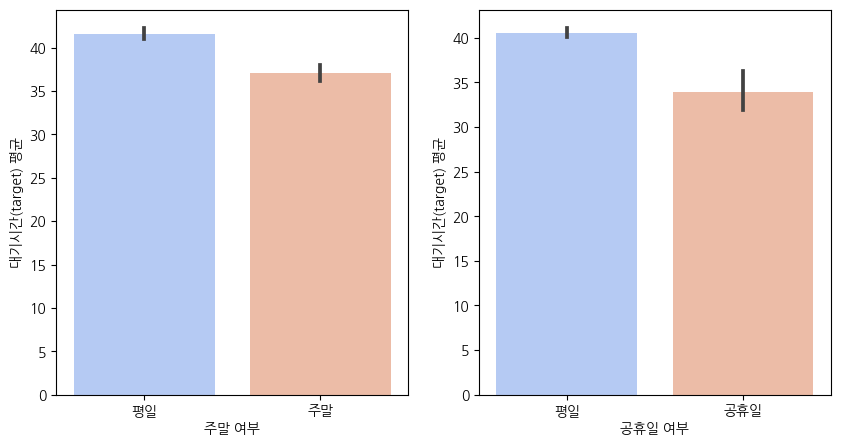

In [86]:
# 시각화
plt.figure(figsize=(10, 5))

# 주말에 따른 대기시간 평균
plt.subplot(1, 2, 1)
sns.barplot(x='weekend', y='target', data=df, palette='coolwarm')
plt.xlabel('주말 여부')
plt.ylabel('대기시간(target) 평균')
plt.xticks(ticks=[0, 1], labels=['평일', '주말'])

# 공휴일에 따른 대기시간 평균
plt.subplot(1, 2, 2)
sns.barplot(x='holiday', y='target', data=df, palette='coolwarm')
plt.xlabel('공휴일 여부')
plt.ylabel('대기시간(target) 평균')
plt.xticks(ticks=[0, 1], labels=['평일', '공휴일'])

plt.show()

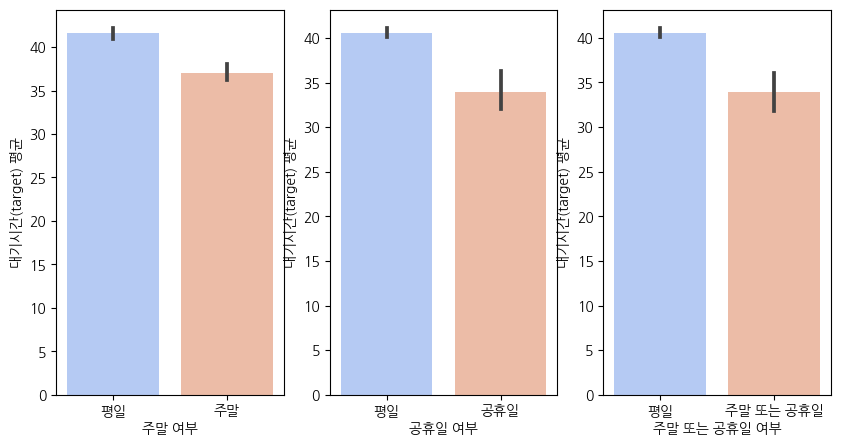

In [87]:
# 주말 + 공휴일 을 합치면?
df['weekend_holiday'] = df[['weekend', 'holiday']].apply(lambda x : np.max(x), axis=1)

# 시각화
plt.figure(figsize=(10, 5))

# 주말에 따른 대기시간 평균
plt.subplot(1, 3, 1)
sns.barplot(x='weekend', y='target', data = df, palette='coolwarm')
plt.xlabel('주말 여부')
plt.ylabel('대기시간(target) 평균')
plt.xticks(ticks=[0, 1], labels=['평일', '주말'])

# 공휴일에 따른 대기시간 평균
plt.subplot(1, 3, 2)
sns.barplot(x='holiday', y='target', data = df, palette='coolwarm')
plt.xlabel('공휴일 여부')
plt.ylabel('대기시간(target) 평균')
plt.xticks(ticks=[0, 1], labels=['평일', '공휴일'])

# 주말 & 공휴일 따른 대기시간 평균
plt.subplot(1, 3, 3)
sns.barplot(x='holiday', y='target', data = df, palette='coolwarm')
plt.xlabel('주말 또는 공휴일 여부')
plt.ylabel('대기시간(target) 평균')
plt.xticks(ticks=[0, 1], labels=['평일', '주말 또는 공휴일'])

plt.show()

#### 장애인콜택시 기본요금

> 관련 자료 링크

* 장애인 콜택시: https://www.sisul.or.kr/open_content/calltaxi/introduce/intro.jsp
* 장애인 콜택시 이용요금: https://www.sisul.or.kr/open_content/calltaxi/introduce/receipt.jsp
* 2015년 과거 장애인콜택시 기사: https://m.blog.naver.com/120seoulcall/220317404447


* 장애인콜택시 현재 요금


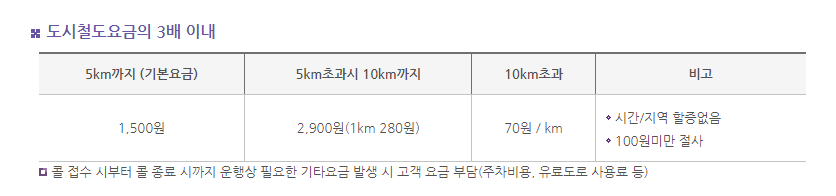


* 2016년 9월 이전까지 (2015-01-01~ 2016-08-31)


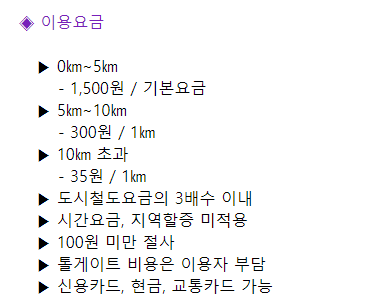

* 시도를 해보았지만, 유의미한 결과를 얻어낼 수 없었다.

## 4.데이터 저장
* **세부요구사항**
    * joblib 을 사용하여 작업 경로에 정리한 데이터프레임을 저장합니다.
        * 저장파일이름 : data1.pkl

In [89]:
df.to_pickle('data1_1.pkl')